In [1]:
import pandas as pd

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Financial_Statements.csv')

# Display the head of the dataframe
df.head()

,Year,Market Cap(in B USD),Revenue,Gross_Profit,Net_Income,Earning_Per_Share,EBITDA,Share_Holder_Equity,Cash_Flow_from_Operating,Cash_Flow_from_Investing,...,Current_Ratio,Debt/Equity_Ratio,ROE,ROA,ROI,Net_Profit_Margin,Free_Cash_Flow_per_Share,Return_on_Tangible_Equity,Number_of_Employees,Inflation_Rate
0,2022,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,122151.0,-22354.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,104038.0,-14545.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,80674.0,-4289.0,...,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,69391.0,45896.0,...,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,77434.0,16066.0,...,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426


In [5]:
# Create a new column 'Profit' using the provided features as independent variables
# For simplicity, I'll sum the 'Revenue', 'Gross_Profit', and 'Net_Income' columns to represent 'Profit'
df['Profit'] = df['Revenue'] + df['Gross_Profit'] + df['Net_Income']

# Display the head of the dataframe to confirm the addition of the new column
df.head()

,Year,Market Cap(in B USD),Revenue,Gross_Profit,Net_Income,Earning_Per_Share,EBITDA,Share_Holder_Equity,Cash_Flow_from_Operating,Cash_Flow_from_Investing,...,Debt/Equity_Ratio,ROE,ROA,ROI,Net_Profit_Margin,Free_Cash_Flow_per_Share,Return_on_Tangible_Equity,Number_of_Employees,Inflation_Rate,Profit
0,2022,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,122151.0,-22354.0,...,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028,664913.0
1,2021,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,104038.0,-14545.0,...,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979,613333.0
2,2020,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,80674.0,-4289.0,...,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336,436882.0
3,2019,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,69391.0,45896.0,...,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122,413822.0
4,2018,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,77434.0,16066.0,...,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426,426965.0


In [6]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()
missing_values

Year                                   0
Market Cap(in B USD)                   1
Revenue                                0
Gross_Profit                           0
Net_Income                             0
Earning_Per_Share                      0
EBITDA                                 0
Share_Holder_Equity                    0
Cash_Flow_from_Operating               0
Cash_Flow_from_Investing               0
Cash_Flow_from_Financial_Activities    0
Current_Ratio                          0
Debt/Equity_Ratio                      0
ROE                                    0
ROA                                    0
ROI                                    0
Net_Profit_Margin                      0
Free_Cash_Flow_per_Share               0
Return_on_Tangible_Equity              0
Number_of_Employees                    0
Inflation_Rate                         0
Profit                                 0
dtype: int64

In [7]:
# Impute the missing value in the 'Market Cap(in B USD)' column with the mean of the column
df['Market Cap(in B USD)'].fillna(df['Market Cap(in B USD)'].mean(), inplace=True)

# Check if the missing value has been imputed
imputed_value = df['Market Cap(in B USD)'].isnull().sum()
imputed_value

0

In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numerical features to be standardized
numerical_features = ['Market Cap(in B USD)', 'Revenue', 'Gross_Profit', 'Net_Income', 'Earning_Per_Share', 'EBITDA', 'Share_Holder_Equity', 'Cash_Flow_from_Operating', 'Cash_Flow_from_Investing', 'Cash_Flow_from_Financial_Activities', 'Current_Ratio', 'Debt/Equity_Ratio', 'ROE', 'ROA', 'ROI', 'Net_Profit_Margin', 'Free_Cash_Flow_per_Share', 'Return_on_Tangible_Equity', 'Number_of_Employees', 'Inflation_Rate', 'Profit']

# Standardize the selected numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the head of the dataframe to show the standardized numerical features
df.head()

,Year,Market Cap(in B USD),Revenue,Gross_Profit,Net_Income,Earning_Per_Share,EBITDA,Share_Holder_Equity,Cash_Flow_from_Operating,Cash_Flow_from_Investing,...,Debt/Equity_Ratio,ROE,ROA,ROI,Net_Profit_Margin,Free_Cash_Flow_per_Share,Return_on_Tangible_Equity,Number_of_Employees,Inflation_Rate,Profit
0,2022,3.215984,3.518779,3.211367,4.521686,0.579538,4.202840,-0.120638,3.724401,-0.791040,...,0.689763,4.133842,2.337519,0.588845,0.870102,0.073009,1.575248,0.082073,2.955120,3.705585
1,2021,4.789892,3.203756,2.779344,4.257028,0.523021,3.810305,0.109624,3.058856,-0.307403,...,0.532644,3.083446,2.187298,0.462999,0.912931,0.073758,1.147601,0.037178,1.262942,3.351233
2,2020,3.567516,2.194945,1.626706,2.331680,0.259652,2.177067,0.151326,2.200368,0.327784,...,0.430219,1.689905,1.133336,0.248394,0.541062,0.053725,0.580248,0.005752,-0.510852,2.139023
3,2019,1.798585,2.036489,1.468688,2.220351,0.224611,2.144051,0.617653,1.785785,3.435901,...,0.219446,1.089477,0.973497,0.197971,0.565351,-0.015075,0.335796,-0.039143,-0.214597,1.980602
4,2018,0.764202,2.096386,1.551669,2.441201,0.225742,2.346792,0.926554,2.081318,1.588434,...,0.169234,0.966165,0.968312,0.190704,0.653382,0.035703,0.285592,-0.061590,0.108181,2.070894


In [16]:
df.to_csv('normalized_financial_stat.csv')

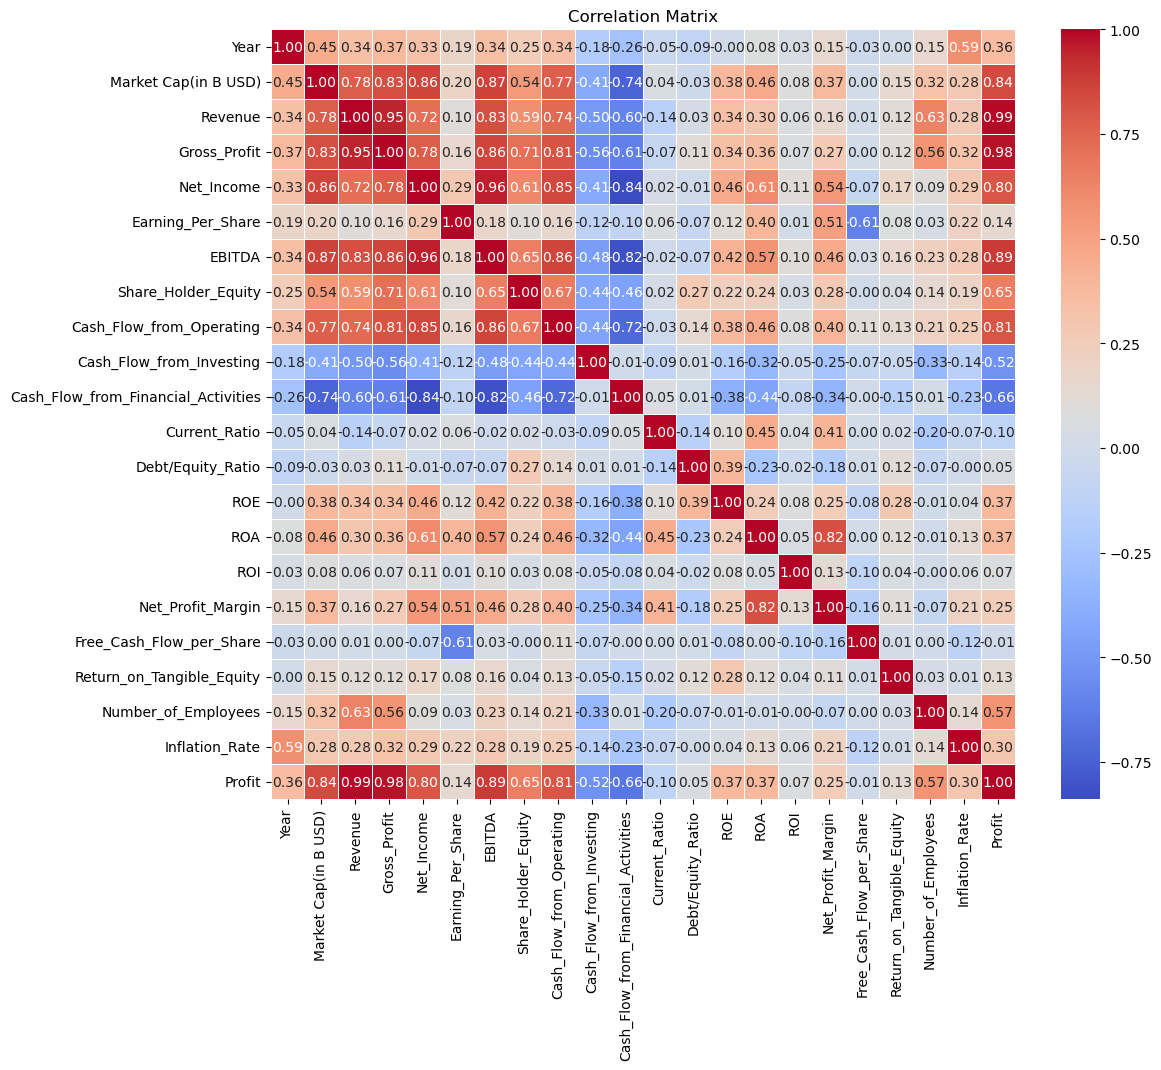

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Separate the features and the target variable
X = df.drop(['Profit', 'Year'], axis=1)
y = df['Profit']

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Fit the model to the data
rf.fit(X, y)

# Get the feature importances
feature_importances = rf.feature_importances_
feature_importances

array([3.17795207e-03, 7.22292073e-01, 2.27438870e-01, 3.43840244e-03,
       6.17854853e-04, 1.96758560e-02, 1.95171331e-03, 5.49322121e-03,
       7.40135401e-04, 3.44171773e-03, 2.37381453e-03, 2.67614387e-03,
       4.41658128e-04, 8.29661880e-04, 4.41548848e-04, 4.13995510e-04,
       1.12519112e-03, 6.52517630e-04, 1.49906269e-03, 1.27861005e-03])

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((128, 20), (33, 20), (128,), (33,))

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.042232867060707883, 0.9681498433176281)

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
from sklearn.metrics import mean_absolute_error

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

mae

0.10229053474174638

In [20]:
# Predicting the output for testing data
y_predict = rf_model.predict(X_test)
y_predict

array([-0.39569805, -0.45540963, -0.18877283, -0.44838172, -0.60113805,
        2.35487984, -0.55968089, -0.76933483, -0.55737385, -0.17534413,
        0.69338753, -0.55196692,  2.11242142, -0.59266818,  0.15629192,
        2.12700825, -0.81307537,  2.68407921, -0.55840325,  1.67543844,
       -0.69159456,  0.86908796, -0.1092643 ,  0.81413062,  1.31100824,
        1.33470071, -0.59231177, -0.48977997, -0.82371268, -0.39211897,
        0.08411416, -0.69351856, -0.21658151])

In [22]:
import pickle

# Save the trained model to a file
with open('startup_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [23]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as file:
    file.write(json.dumps(columns))